# Capsule Networks HW

This homework is strongly based on https://github.com/higgsfield/Capsule-Network-Tutorial/blob/master/Capsule%20Network.ipynb. 

In case you want to check CapsNet on MNIST feel free to do that (link above).

## Task

Your task is to **get at least 75% test accuracy on CIFAR10 (in the original paper ~90%) in no more than 10 epochs**. For this you may consider tuning various parameters.

<br>
Start with some **obvious stuff**:

- Stack more convolutional layers before capsule layers.
- Increase the size of the capsule layers (more capsules, larger capsules etc.). Note that it may take a lot of time.
- Play with number of routing iterations in forward pass.
- Play with kernel size of convolutions in the first layer (don't forget to change parameters of subsequent layers).
- Play with kernel size of capsules in the second layer (again, pay attention to the parameters of subsequent computations).

Then, you may consider more **advansed ideas**.

- Try different variants of original implementation's loss function (change m+, m-, lambda, get rid of square etc.).
- Try different loss functions (make it pure Hinge or pure MSE, maybe even cross-entropy!).
- Try different implementation of capsules (not usual convolution operation, but maybe fully connected groups of neurons).
- Try different non-linearities for capsules (changing ^2 to ^4 doesn't count!).
- Try different weights for reconstruction loss.

<br>
For each of the tested ideas **supply a mini-report (create a markdown cell above the implementation)**. This mini-report should cover what is the idea (ex: _"I increased the number of routing iterations from 3 to 10."_), and if the idea is not obvious (like stacking more layers), please supply 1/2-sentence justification for it (ex: _"I changed m+ to 0.7 because I think that we really do not need such high certainty in classification. I speculate that it will speed-up training, taking into account that pictures in CIFAR10 are much less alike than in MNIST we really do not need to be 90% sure, just 70% and it will lead to the same result."_).

<br>
The final subtask is to **propose an idea in which capsules may be used in future and briefly explain motivation for it**. 

Ex: _"The capsule representation of the object may be a great input for a GAN if coupled with usual GAN input (random noise vector). I think that capsules' generalized representations of objects may serve as an additional guide for a GAN so as to get expected results in image generation and not random ones. If we tune some coordinates in a capsule vector a little, we vary the reconstruction result (demonstrated in the paper), so, if we add up random noise vector and capsule representation (also tweaked to our desire) we can get various representations of the same object. For example we vary the coordinate 0 of the capsule and supply it to GAN we may get red apple, yellow apple, green apple etc. the random noise is needed to get different red apples, different yellow apples etc."_

## Final Mini-report

<small>The homework was performed by the user Prickly_u (registered under email kterehova@gmail.com)<br/></small>

When launched on colab.research.google.com, initial implementation gave about 66% test accuracy. Introduced enhancements allowed to achieve 0.7563999999999997 accuracy on the 9th epoch (0.7555999999999998 on the 10th), with one epoch runing for ~833 seconds. (Output of the <b>Training</b> section was preserved; [jump to](#jump_training))<br/><br/>

The modifications that helped to improve the result were as following:
<ul>
<li>In confirmation of the paper from the group chat, the most significant increase was gained by stacking additional convolutional layer in front of capsule layers. A new layer has changed the size of the input for subsequent ones, so the kernel sizes for the two convolutional layers and first capsule layer had to be aligned. The kernel_size=7 for convolution layers and kernel_size=5 for capsule layer were selected. As result, that gave about 4-5% growth. Appending one more convolutional layer showed no positive results.</li>
<li><i>(parameters from "advanced" section).</i> The images in CIFAR-10 dataset are much more complex then in MNIST and the 32x32 resolution sometimes is not enough to discern similar classes even by the human eye. So, high threshold of m+ in the loss function can possibly lead to just overfitting on minor details. I've changed it to the 0.7 value, mentioned in this notebook. However, images from non-similar classes looks like having so many differences that it should be possible to say "that's not ..." with high degree of confidence. Thus, I've lowered the m- parameter to 0.05 value. Together, that improved the accuracy for about 1-2%. I've also tried to change the "stability lambda", but saw no growth. </li>
<li><i>(parameters from "advanced" section).</i> During experiments with reconstruction_loss() function, I wondered what contribution it was giving and completely switched it off to see. Suddenly, that gave me remaining 3 - 3.5%. As the task was to improve recognition accuracy only, and reconstructions were rubbish all the same, I've left the loss function in this state. I guess, the reconstruction_loss deteriorates the recognition accuracy due to either bad recognition quality on CIFAR-10 or by changing the loss function to the form that is difficult to take the gradent from. For me, summing of two loss function with different natures and behaviors looks like a doubtful idea, especially when suspecting that standard library optimizers can be aimed on standard loss functions' appearance. <br/>
If the reconstruction quality was included in the task, I would prefer to train decoder separately, with its own loss function, optimizer and parameters update.</li>
</ul>
Besides this, I've tried to change the u = u.view(x.size(0), 64 &ast; 8 &ast; 8, -1) line in PrimaryCaps to make the last dimension  divide the output by eight capsules, not the eight width pixels. (yeah, I've done it even after clarification in the group chat). It looked like giving 1-2% growth, but led to numerous memory erros, especially when combined with other modifications, so I brought it back.
<br/>
<br/>
Just in case, the attempts that didn't worked for me:
<ul><li>Increasing num_iterations to 4 or 5 turned out to be useless, or even detrimental (I do not remember exactly)</li>
<li>Neither the change of capsules amount in PrimaryCaps (10 or 12) nor amount of their output channels (96) took  effect. The out_channels parameter set to 128, again, caused memory erros.</li>
<li>Before eliminating reconstruction_loss totally, I've played with it a little. I guess, that not absolute values of the pixels form an image, but their relative brightness do. (The dark and bright versions of the same image are still perceived as the same). So MAPE loss function looked as tempting variant; but as I know, it is hard to differentiate and it is recommended to use MAE along with log() and exp() instead of it. I've written the corresponding code, but unfortunately, this thought turned out to be too abstruse and the training process got absolutely destabilized :(</li>
<li>The kernel_size parameters gone through several changes too, along with stride=2, but showed no significant success.</li></ul>

# Capsules Networks

## Research idea

Possibly, the relations between many primary capsules and the whole object along with the relation between the whole object and a specific part may be used for damaged parts detections. When most of the capsules with hight value of c_ij coefficients give co-directional vectors, but one high-c_ij capsule gives a vector with absolutely different direction, this can be an indicator of malformed detail.<br/> This may be applied not only for checking an images block, but as well to search breakages in audio records or to detec pronunciation and accent mistakes. Human speach seems to fit the concept of hierarchial capsules quite well: the sounds form (a finit number of admissible) syllables, syllables in a specific order form words, a sequence of words following grammar rules form sentences (interrogative, narrative, imperative, etc.) and topics. The problem of a large number of combinations and computational complexity arises, of course, but as computer powers are increasing and reuse of pre-trained models is gaining popularity, that difficulties might be overcome in the achievable future. 

## Setup

After you have uploaded this notebook to Google Collaboratory you may start running it (if you have fast GPU, you can run it locally). 

First of all you need to install pytorch. The code below does that for you.

Every 24 hours Google Collaboratory reboots. Make sure you either run operations that require less than 24 hours of computation or you log your progress so that you can avoid starting from scratch every time.

The notebooks are stored in your root Google Drive folder and you can save other files there as well (requires some googling).

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision

In [2]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam
from torchvision import datasets, transforms

from time import time

USE_CUDA = True

## CIFAR-10 data loader/generator.

Code below setups image generators from folder './data' (this folder is not saved and will be erased every 24 hours). 

Normalization values for CIFAR10 are taken from pytorch website (usual normalization values for the task).

In [3]:
class Cifar10:
    def __init__(self, batch_size):
        dataset_transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
                   ])

        train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=dataset_transform)
        test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=dataset_transform)
        
        self.train_loader  = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        self.test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)       

## Network

Recall the architecture of CapsNet. This tutorial walks you through building process of it. Note that actual values of parameters such as "number of capsules", "number of filters in the first layer" etc. are not taken from MNIST implementation in the original paper, but instead from CIFAR10 implementation.

![alt text](https://cdn-images-1.medium.com/max/2000/1*uItEGzY1I9NK6hl1u4hPYg.png)

### Pre-capsule layer

This is a usual convolution layer that extracts basic features from images.

In [0]:
class ConvLayer(nn.Module):
    def __init__(self, in_channels=3, out_channels=256, kernel_size=7):
        super(ConvLayer, self).__init__()

        self.conv = nn.Conv2d(in_channels=in_channels,
                               out_channels=out_channels,
                               kernel_size=kernel_size,
                               stride=1
                             )

    def forward(self, x):
        return F.relu(self.conv(x))
      


### First capsule layer (PrimaryCaps)

This is the second layer of the network and the first one which contains capsules (recall that capsules are just groups of neurons).

The squash operation is the following one:

\begin{align}
v_j & = \frac{(\|s_j\|^2)}{(1 + \|s_j\|^2)} \frac{s_j}{\|s_j\|}\\
\end{align}

It takes a vector s_j as input, normalizes it to unit norm and then adds some non-linearity so that large vectors become close to 1 and small vectors close to zero. Recall that it is needed to enforce the property of v_j's norm being the probability (or certainty) that object is detected by the capsule v_j.

In [0]:
class PrimaryCaps(nn.Module):
    def __init__(self, num_capsules=8, in_channels=256, out_channels=64, kernel_size=5):
        super(PrimaryCaps, self).__init__()

        self.capsules = nn.ModuleList([
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=2, padding=0) 
                          for _ in range(num_capsules)])
    
    def forward(self, x):
        u = [capsule(x) for capsule in self.capsules]
        u = torch.stack(u, dim=1)
        #print u.size()
        u = u.view(x.size(0), 64 * 8 * 8, -1)
        #u = u.view(x.size(0), 8, 64 * 8 * 8).transpose(1,2)
        #print u.size()
        return self.squash(u)
    
    def squash(self, input_tensor):
        #print input_tensor.data[0]
        squared_norm = (input_tensor ** 2).sum(-1, keepdim=True)
        #print squared_norm
        output_tensor = squared_norm *  input_tensor / ((1. + squared_norm) * torch.sqrt(squared_norm))
        return output_tensor

### Second capsule layer (DigitCaps)

This is the final layer of the network and the one that contains digit-capsules (or in case of CIFAR10 - class-capsules) which predict the class on the image.

Below you may see the dynamic routing algorithm from the original paper under the forward section of the layer.

![alt text](https://cdn-images-1.medium.com/max/2000/1*ukE9EQ6Yd6IPIu1cLJWSEQ.png)

In [0]:
class DigitCaps(nn.Module):
    def __init__(self, num_capsules=10, num_routes=64 * 8 * 8, in_channels=8, out_channels=16):
        super(DigitCaps, self).__init__()

        self.in_channels = in_channels
        self.num_routes = num_routes
        self.num_capsules = num_capsules

        self.W = nn.Parameter(torch.randn(1, num_routes, num_capsules, out_channels, in_channels))

    def forward(self, x):
        batch_size = x.size(0)
        x = torch.stack([x] * self.num_capsules, dim=2).unsqueeze(4)

        W = torch.cat([self.W] * batch_size, dim=0)
        u_hat = torch.matmul(W, x)

        b_ij = Variable(torch.zeros(1, self.num_routes, self.num_capsules, 1))
        if USE_CUDA:
            b_ij = b_ij.cuda()

        num_iterations = 3
        #num_iterations = 4
        for iteration in range(num_iterations):
            c_ij = F.softmax(b_ij)
            c_ij = torch.cat([c_ij] * batch_size, dim=0).unsqueeze(4)

            s_j = (c_ij * u_hat).sum(dim=1, keepdim=True)
            v_j = self.squash(s_j)
            
            if iteration < num_iterations - 1:
                a_ij = torch.matmul(u_hat.transpose(3, 4), torch.cat([v_j] * self.num_routes, dim=1))
                b_ij = b_ij + a_ij.squeeze(4).mean(dim=0, keepdim=True)

        return v_j.squeeze(1)
    
    def squash(self, input_tensor):
        squared_norm = (input_tensor ** 2).sum(-1, keepdim=True)
        output_tensor = squared_norm *  input_tensor / ((1. + squared_norm) * torch.sqrt(squared_norm))
        return output_tensor

### Reconstruction part of network (decoder)

This is the second task for the network, namely, to reconstruct the image from the final class-capsules. 

This is a useful technique of regularization to prevent overfitting and also to enforce the property of capsules representing the 'instantiation parameters' of the object. In other words, final capsule should contain information about the class it predicts and that information (implicitly) may be: rotation angle, distortion, illumination etc.

The reconstruction is done by a simple decoder (stack of fully-connected layers). Below is the picture for MNIST.

![alt text](https://raw.githubusercontent.com/deepblacksky/capsnet-tensorflow/master/images/recong.png)

In [0]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        
        self.reconstraction_layers = nn.Sequential(
            nn.Linear(16 * 10, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 1024*3),
            nn.Sigmoid()
        )
        
    def forward(self, x, data):
        classes = torch.sqrt((x ** 2).sum(2))
        classes = F.softmax(classes)
        
        _, max_length_indices = classes.max(dim=1)
        masked = Variable(torch.sparse.torch.eye(10))
        if USE_CUDA:
            masked = masked.cuda()
        masked = masked.index_select(dim=0, index=F.Variable(max_length_indices.squeeze(1).data))
        
        reconstructions = self.reconstraction_layers((x * masked[:, :, None, None]).view(x.size(0), -1))
        reconstructions = reconstructions.view(-1, 3, 32, 32)
        
        return reconstructions, masked

### Full network (CapsNet)

This is a final forward pass for the whole network. The only new part here is the custom loss from the original paper.

![alt text](https://cdn-images-1.medium.com/max/1493/1*y-bVFuiLReqSSdmdZ6wAmA.png)

In [0]:
class CapsNet(nn.Module):
    def __init__(self):
        super(CapsNet, self).__init__()
        self.conv_layer = ConvLayer()
        self.conv_layer2 = ConvLayer(in_channels=256, out_channels=256)
        self.primary_capsules = PrimaryCaps()
        self.digit_capsules = DigitCaps()
        self.decoder = Decoder()
        
        self.mse_loss = nn.MSELoss()
        self.l1_loss = nn.L1Loss()
        
    def forward(self, data):
        output = self.digit_capsules(self.primary_capsules(self.conv_layer2(self.conv_layer(data))))
        reconstructions, masked = self.decoder(output, data)
        return output, reconstructions, masked
    
    def loss(self, data, x, target, reconstructions):
        return self.margin_loss(x, target) #+ self.reconstruction_loss(data, reconstructions)
    
    def margin_loss(self, x, labels, size_average=True):
        batch_size = x.size(0)

        v_c = torch.sqrt((x**2).sum(dim=2, keepdim=True))

        #left = (F.relu(0.9 - v_c)**2).view(batch_size, -1)
        #right = (F.relu(v_c - 0.1)**2).view(batch_size, -1)

        #loss = labels * left + 0.5 * (1.0 - labels) * right
        
        left = (F.relu(0.7 - v_c)**2).view(batch_size, -1)
        right = (F.relu(v_c - 0.05)**2).view(batch_size, -1)

        loss = labels * left + 0.5 * (1.0 - labels) * right
        loss = loss.sum(dim=1).mean()

        return loss
    
    def reconstruction_loss(self, data, reconstructions):
        loss = self.mse_loss(reconstructions.view(reconstructions.size(0), -1), data.view(reconstructions.size(0), -1))
        #loss = torch.exp(self.l1_loss(
        #    torch.log(reconstructions.view(reconstructions.size(0), -1)),
        #    torch.log(data.view(reconstructions.size(0), -1))))
        return loss * 0.0005

Here the model is compiled with Adam optimizer with basic parameters.

In [0]:
capsule_net = CapsNet()
if USE_CUDA:
    capsule_net = capsule_net.cuda()
optimizer = Adam(capsule_net.parameters())

<a id='jump_training'></a>
## Training

Note that one epoch takes a lot of time even on GPU, so don't rush and plan everything ahead and try to justify your ideas prior to implementing them.

In [16]:
batch_size = 100
# dataset = Mnist(batch_size)
dataset = Cifar10(batch_size)

n_epochs = 10


for epoch in range(n_epochs):
    ep_start = time()
    capsule_net.train()
    train_loss = 0
    train_accuracy = 0
    for batch_id, (data, target) in enumerate(dataset.train_loader):
        st = time()

        target = torch.sparse.torch.eye(10).index_select(dim=0, index=target)
        data, target = Variable(data), Variable(target)

        if USE_CUDA:
            data, target = data.cuda(), target.cuda()

        optimizer.zero_grad()
        output, reconstructions, masked = capsule_net(data)
        loss = capsule_net.loss(data, output, target, reconstructions)
        loss.backward()
        optimizer.step()

        train_loss += loss.data[0]
        
        tr_accuracy = sum(np.argmax(masked.data.cpu().numpy(), 1) == 
                          np.argmax(target.data.cpu().numpy(), 1)) / float(batch_size)
        train_accuracy += tr_accuracy
        if batch_id % 100 == 0 or batch_id == 499:
            print "train accuracy [batch {}]:".format(batch_id), tr_accuracy
        en = time()
#         print 'Sec per batch', round(en-st, 2)
    ep_end = time()
    print 'Total train loss', train_loss / len(dataset.train_loader)
    print 'Total train accuracy', train_accuracy / len(dataset.train_loader)
    print 'Total time for training an epoch: {}'.format(int(ep_end - ep_start))
        
    capsule_net.eval()
    test_loss = 0
    test_accuracy = 0
    for batch_id, (data, target) in enumerate(dataset.test_loader):

        target = torch.sparse.torch.eye(10).index_select(dim=0, index=target)
        data, target = Variable(data), Variable(target)

        if USE_CUDA:
            data, target = data.cuda(), target.cuda()

        output, reconstructions, masked = capsule_net(data)
        loss = capsule_net.loss(data, output, target, reconstructions)

        test_loss += loss.data[0]
        ts_accuracy = sum(np.argmax(masked.data.cpu().numpy(), 1) == 
                          np.argmax(target.data.cpu().numpy(), 1)) / float(batch_size)
        test_accuracy += ts_accuracy
        if batch_id % 25 == 0 or batch_id == 99:
            print "test accuracy [batch {}]:".format(batch_id), ts_accuracy
    
    print 'Total test loss', test_loss / len(dataset.test_loader)
    print 'Total test accuracy', test_accuracy / len(dataset.test_loader)
    
    

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


train accuracy [batch 0]: 0.17
train accuracy [batch 100]: 0.31
train accuracy [batch 200]: 0.4
train accuracy [batch 300]: 0.47
train accuracy [batch 400]: 0.44
train accuracy [batch 499]: 0.54
Total train loss 0.298099694043
Total train accuracy 0.38224
Total time for training an epoch: 832
test accuracy [batch 0]: 0.45
test accuracy [batch 25]: 0.48
test accuracy [batch 50]: 0.51
test accuracy [batch 75]: 0.43
test accuracy [batch 99]: 0.58
Total test loss 0.234083374888
Total test accuracy 0.5108000000000001
train accuracy [batch 0]: 0.61
train accuracy [batch 100]: 0.47
train accuracy [batch 200]: 0.56
train accuracy [batch 300]: 0.52
train accuracy [batch 400]: 0.57
train accuracy [batch 499]: 0.57
Total train loss 0.208724203259
Total train accuracy 0.56348
Total time for training an epoch: 830
test accuracy [batch 0]: 0.64
test accuracy [batch 25]: 0.53
test accuracy [batch 50]: 0.7
test accuracy [batch 75]: 0.62
test accuracy [batch 99]: 0.66
Total test loss 0.191502436399
Tot

## Reconstructions

Here you can view the reconstructions obtained by your CapsNet. Nothing special here, just fun to visualize them. Actually, for mnist the reconstructions are great, however for CIFAR10 they are rubbish (see the original paper for clues on that).

Be careful when running reconstructions after `keyboard_interrupt`, because this may result in wrong input-target values.

In [10]:
import matplotlib
import matplotlib.pyplot as plt

def plot_images_separately(images):
    "Plot the six CIFAR10 images separately."
    fig = plt.figure()
    for j in xrange(1, 7):
        ax = fig.add_subplot(1, 6, j)
        ax.matshow(images[j-1], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

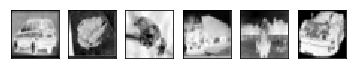

In [11]:
plot_images_separately(data[:6,0].data.cpu().numpy())

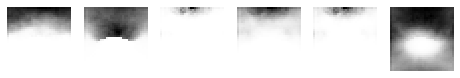

In [12]:
plot_images_separately(reconstructions[:6,0].data.cpu().numpy())

## Grading

The **deadline is March 16, 2018 20.00**

75% test accuracy in 10 epochs gives you 7 points.

Playing with at least 2 parameters in the advanced section gives you another 2 points in case you supplied mini-report with justification for it.

Proposing not-so-obvious research idea will give you another 1 point.

## Contacts

Should you have any questions regarding the assignment contact Nikita Seleznev: http://telegram.me/stleznev

However, please, avoid an avalanche of messages during the last hours before the deadline :)